## Heart Disease Prediction

## Life Cycle of Machine Learning

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratoy Data Analysis
- Data Pre-processing
- Model Training
- Choose the best Model

### 1) Problem Statement
-This project seeks to understand how the risk of heart disease is affected by various factors such as Gender, Age, Education Level, Smoking Status, Cigarettes Consumed Per Day, Blood Pressure Medication, Prevalent Stroke, Prevalent Hypertension, Diabetes, Total Cholesterol, Systolic Blood Pressure, Diastolic Blood Pressure, Body Mass Index (BMI), Heart Rate, and Glucose Levels.
### 2) The Project goal
- The goal is to analyze the impact of these factors on the likelihood of heart disease and make predictions based on the provided features
### 3) Data Source
- Dataset source - https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
- This data consists of 16 columns and 4240 rows

### 3.1 Import Data and Required Packages

In [142]:
#Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset as pandas Dataframe

In [143]:
df = pd.read_csv('Data\\framingham.csv')

#### show the top 5 records from the dataset

In [144]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### shape of the dataset

In [145]:
df.shape

(4240, 16)

### 4) Data Checks to perform
- Normalizing the columns names
- Check missing values
- Check Duplicates
- Check data types
- Check number of unique values in each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 4.1) Normalizing the columns names

In [146]:
df.columns=df.columns.str.lower()
df.columns

Index(['male', 'age', 'education', 'currentsmoker', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

### 4.2) displaying the ranges of feature values

In [147]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

male
[1 0]
2
age
[39 46 48 61 43]
39
education
[ 4.  2.  1.  3. nan]
4
currentsmoker
[0 1]
2
cigsperday
[ 0. 20. 30. 23. 15.]
33
bpmeds
[ 0.  1. nan]
2
prevalentstroke
[0 1]
2
prevalenthyp
[0 1]
2
diabetes
[0 1]
2
totchol
[195. 250. 245. 225. 285.]
248
sysbp
[106.  121.  127.5 150.  130. ]
234
diabp
[70. 81. 80. 95. 84.]
146
bmi
[26.97 28.73 25.34 28.58 23.1 ]
1364
heartrate
[80. 95. 75. 65. 85.]
73
glucose
[ 77.  76.  70. 103.  85.]
143
tenyearchd
[0 1]
2


### 4.2) Mapping the numerical values into Categorical for easy understanding of the dataset information

In [148]:
male_values = {0: 'no', 1: 'yes'}
df['male'] = df['male'].map(male_values)

currentsmoker_values = {0: 'non_smoker', 1: 'smoker'}
df['currentsmoker'] = df['currentsmoker'].map(currentsmoker_values)

stroke_values = {0: 'no_stroke', 1: 'stroke'}
df['prevalentstroke'] = df['prevalentstroke'].map(stroke_values)

hype_values = {0: 'no_hypertension', 1: 'hypertension'}
df['prevalenthyp'] = df['prevalenthyp'].map(hype_values)

diabetes_values = {0: 'no_diabetes', 1: 'diabetes'}
df['diabetes'] = df['diabetes'].map(diabetes_values)
bpmeds_values = {0: 'no bp meds', 1: 'bp meds'}
df['bpmeds']=df['bpmeds'].map(bpmeds_values)


In [149]:
df.head(2)


,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,yes,39,4.0,non_smoker,0.0,no bp meds,no_stroke,no_hypertension,no_diabetes,195.0,106.0,70.0,26.97,80.0,77.0,0
1,no,46,2.0,non_smoker,0.0,no bp meds,no_stroke,no_hypertension,no_diabetes,250.0,121.0,81.0,28.73,95.0,76.0,0


### 4.3) Checking the dtypes

In [150]:
df.dtypes

male                object
age                  int64
education          float64
currentsmoker       object
cigsperday         float64
bpmeds              object
prevalentstroke     object
prevalenthyp        object
diabetes            object
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
tenyearchd           int64
dtype: object

### 4.4) Checking the duplicates

In [151]:
df.duplicated().sum()

0

## 4.5 ) Checking the Outliers

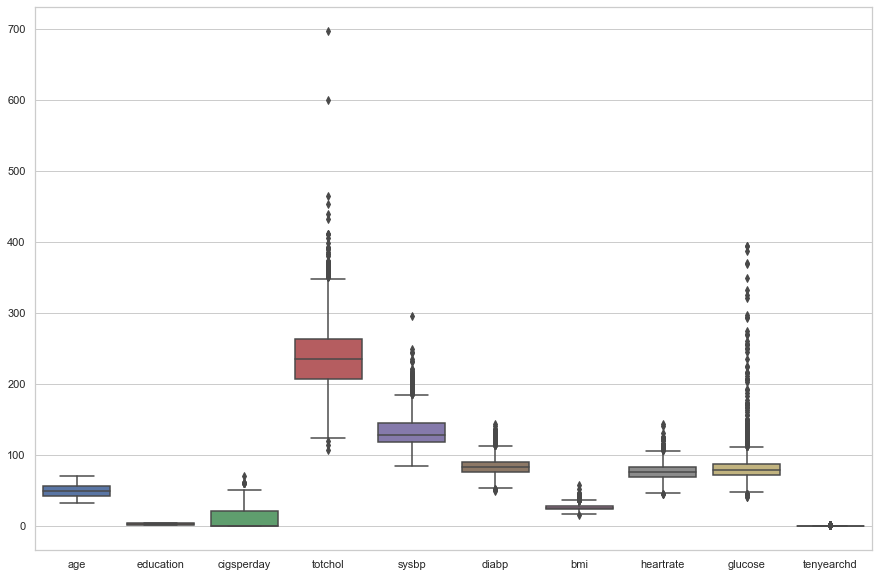

In [152]:
plt.figure(figsize=(15,10),facecolor='w')
sns.boxplot(data=df)
plt.show()

In [153]:
def out_iqr(df, columns):
    q25, q75 = df[columns].quantile([0.25,0.75])
    irq = q75 - q25
    lower, upper = q25 - 1.5 * irq, q75 + 1.5 * irq
    
    print(f"The IQR is {irq:.2f}")
    print(f"The lower bound is {lower:.2f}")
    print(f"The upper bound is {upper:.2f}")
    
    outliers = df[(df[columns] < lower) | (df[columns] > upper)]
    print(f"Total number of outliers: {outliers.shape[0]}")
    
    
columns = ['age','cigsperday', 'totchol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose']
for column in columns:
    print(column)
    out_iqr(df, column)  
    print()  

age
The IQR is 14.00
The lower bound is 21.00
The upper bound is 77.00
Total number of outliers: 0

cigsperday
The IQR is 20.00
The lower bound is -30.00
The upper bound is 50.00
Total number of outliers: 12

totchol
The IQR is 57.00
The lower bound is 120.50
The upper bound is 348.50
Total number of outliers: 56

sysbp
The IQR is 27.00
The lower bound is 76.50
The upper bound is 184.50
Total number of outliers: 126

diabp
The IQR is 15.00
The lower bound is 52.50
The upper bound is 112.50
Total number of outliers: 77

bmi
The IQR is 4.97
The lower bound is 15.62
The upper bound is 35.49
Total number of outliers: 97

heartrate
The IQR is 15.00
The lower bound is 45.50
The upper bound is 105.50
Total number of outliers: 76

glucose
The IQR is 16.00
The lower bound is 47.00
The upper bound is 111.00
Total number of outliers: 188



#### We dont have much outliers in the dataset so we may opt to treat them instead of deleting  them

### 4.5.1) Imputing Outliers:

In [154]:
def impute_outlier(df,columns):
    q1,q3=df[columns].quantile([0.25,0.75])
    iqr=q3-q1
    lower_tail,upper_tail=q1-1.5*iqr,q3+1.5*iqr
    median=df[columns].median()
    
    df[columns] = df[columns].apply(lambda x: median if x < lower_tail or x > upper_tail else x)
    print(f'Outliers in {columns} have being replaced with the median')
    
columns = ['age','cigsperday', 'totchol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose']
for column in columns:
    impute_outlier(df,column)    
    

Outliers in age have being replaced with the median
Outliers in cigsperday have being replaced with the median
Outliers in totchol have being replaced with the median
Outliers in sysbp have being replaced with the median
Outliers in diabp have being replaced with the median
Outliers in bmi have being replaced with the median
Outliers in heartrate have being replaced with the median
Outliers in glucose have being replaced with the median


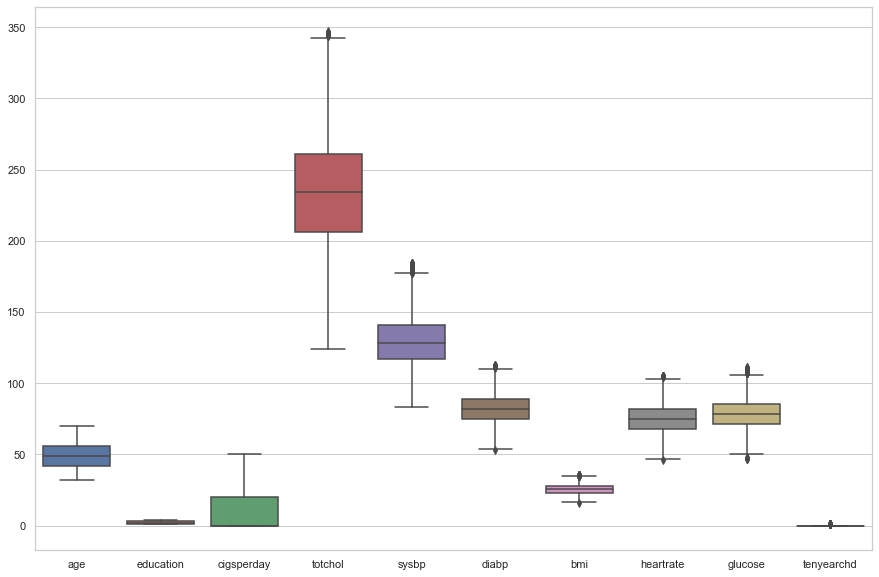

In [155]:
# check to confirm if outliers have being removed
plt.figure(figsize=(15,10),facecolor='w')
sns.boxplot(data=df)
plt.show()

### 4.6 ) Checking the missing values

In [156]:
df.isnull().mean()*100

male               0.000000
age                0.000000
education          2.476415
currentsmoker      0.000000
cigsperday         0.683962
bpmeds             1.250000
prevalentstroke    0.000000
prevalenthyp       0.000000
diabetes           0.000000
totchol            1.179245
sysbp              0.000000
diabp              0.000000
bmi                0.448113
heartrate          0.023585
glucose            9.150943
tenyearchd         0.000000
dtype: float64

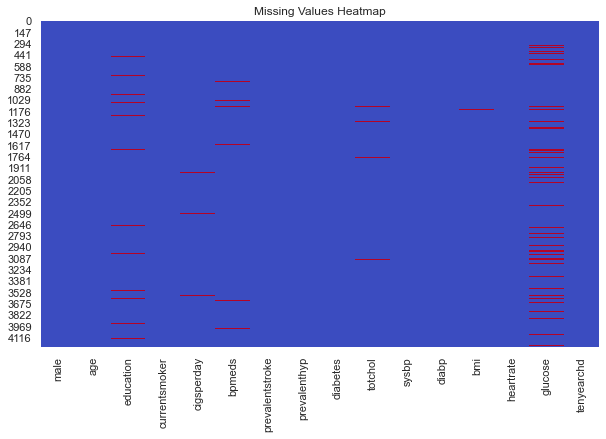

In [157]:
# Visualizing missing
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), annot=False, cmap='coolwarm', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

#### There are missing values in the dataset

### 4.6.1) Filling the mising values

In [158]:
## filling missing values
from sklearn.impute import SimpleImputer
numeric_col=['cigsperday','totchol','bmi','heartrate','glucose']
categorical_col=['education','bpmeds']
mean_imputer=SimpleImputer(strategy='mean')
df[numeric_col]=mean_imputer.fit_transform(df[numeric_col])

mode_imputer=SimpleImputer(strategy='most_frequent')
df[categorical_col]=mode_imputer.fit_transform(df[categorical_col])


### 4.7) checking the information of the dataset

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentsmoker    4240 non-null   object 
 4   cigsperday       4240 non-null   float64
 5   bpmeds           4240 non-null   object 
 6   prevalentstroke  4240 non-null   object 
 7   prevalenthyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totchol          4240 non-null   float64
 10  sysbp            4240 non-null   float64
 11  diabp            4240 non-null   float64
 12  bmi              4240 non-null   float64
 13  heartrate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  tenyearchd       4240 non-null   int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 530.1+ KB


### 4.8) Checking the stats of the dataset

In [160]:
df.describe()

,age,education,cigsperday,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,1.955189,8.832581,234.859666,130.236675,82.259906,25.488910,75.246520,78.464694,0.151887
std,8.572942,1.018522,11.564898,40.342762,18.481708,10.664251,3.481798,10.906164,10.241852,0.358953
min,32.000000,1.000000,0.000000,124.000000,83.500000,53.000000,15.960000,46.000000,47.000000,0.000000
25%,42.000000,1.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,261.000000,141.000000,89.000000,27.770000,82.000000,84.000000,0.000000
max,70.000000,4.000000,50.000000,347.000000,184.500000,112.500000,35.450000,105.000000,111.000000,1.000000


## 5) Exploratory Analysis

### 5.1) Target Variable analysis

In [184]:
df.tenyearchd.value_counts(normalize=True)

0    0.848113
1    0.151887
Name: tenyearchd, dtype: float64

In [181]:
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0,0,0,0,195.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,23.10,85.0,85.0,0


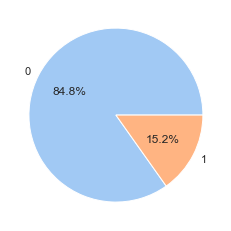

In [162]:
color=sns.color_palette('pastel')[0:5]
data=df['tenyearchd'].value_counts()
label=data.index
plt.pie(data,labels=label,colors=color,autopct="%1.1f%%")
plt.show()

#####  Conclusion: The distribution of target variable is highly imbalanced.This will lead problem in fitting of models.Therefore this problem should be handled.

### 5.2) Univarite Analysis

- Categorical variables

In [163]:
categorical_columns=['male','currentsmoker','bpmeds','prevalentstroke','prevalenthyp','diabetes']
for feature in categorical_columns:
    print(feature)
    print(df[feature].value_counts())
    print()

male
no     2420
yes    1820
Name: male, dtype: int64

currentsmoker
non_smoker    2145
smoker        2095
Name: currentsmoker, dtype: int64

bpmeds
no bp meds    4116
bp meds        124
Name: bpmeds, dtype: int64

prevalentstroke
no_stroke    4215
stroke         25
Name: prevalentstroke, dtype: int64

prevalenthyp
no_hypertension    2923
hypertension       1317
Name: prevalenthyp, dtype: int64

diabetes
no_diabetes    4131
diabetes        109
Name: diabetes, dtype: int64



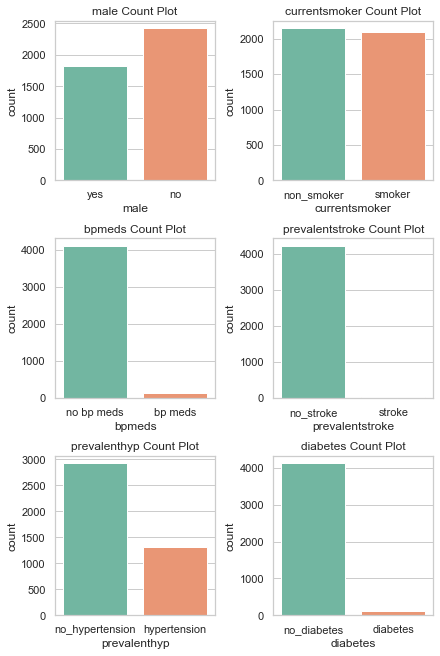

In [164]:
num_plots=len(categorical_columns)
total_columns=2
total_rows=(num_plots+total_columns -1)//total_columns
fig,axs=plt.subplots(nrows=total_rows,ncols=total_columns,figsize=(3*total_columns,3*total_rows),constrained_layout=True)

axs=axs.flatten()
for i, var in enumerate(categorical_columns):
    sns.countplot(x=var, data=df, ax=axs[i], palette='Set2')
    axs[i].set_title(f'{var} Count Plot')


#### Conclusion:
- bpmeds,diabetes and prevalentstroke are highly imbalanced
- The number of non_smoker and smoker in Currentsmoker are almost the same

- Numeric Variables

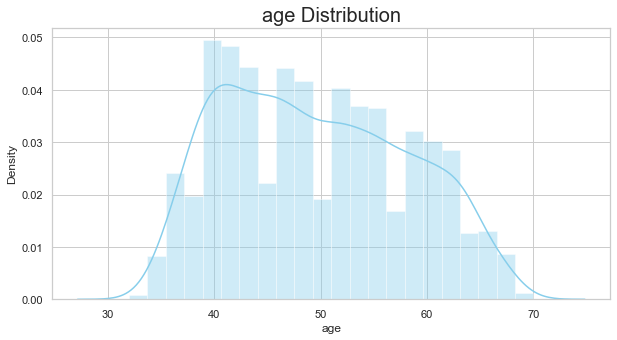

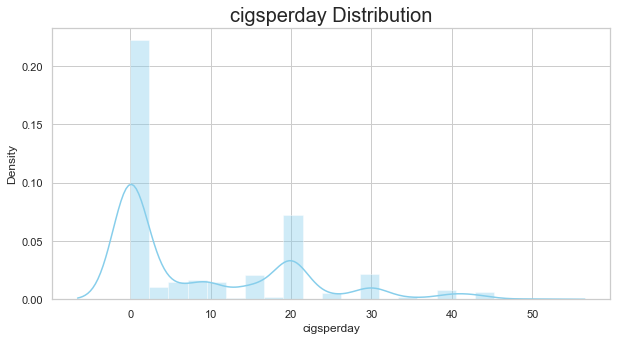

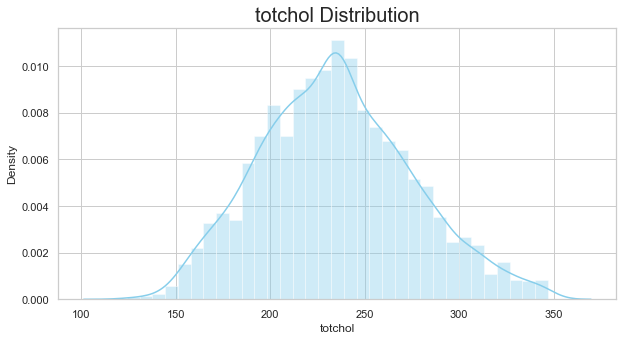

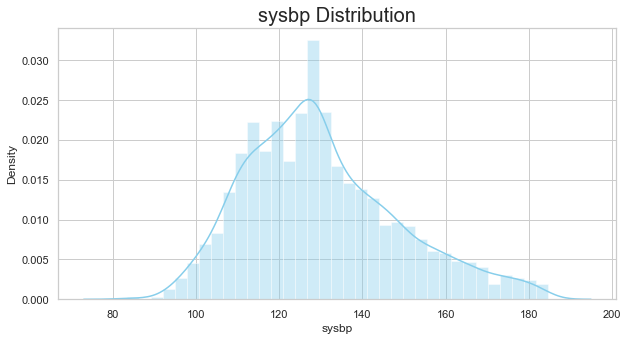

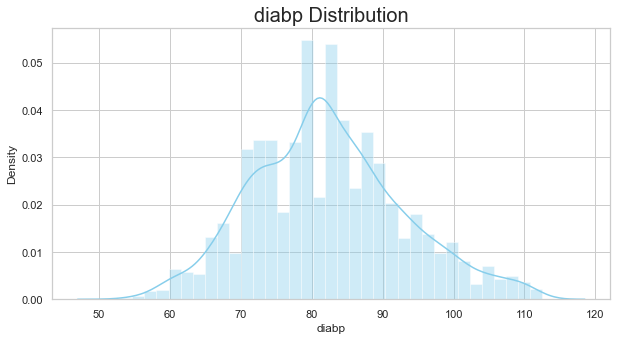

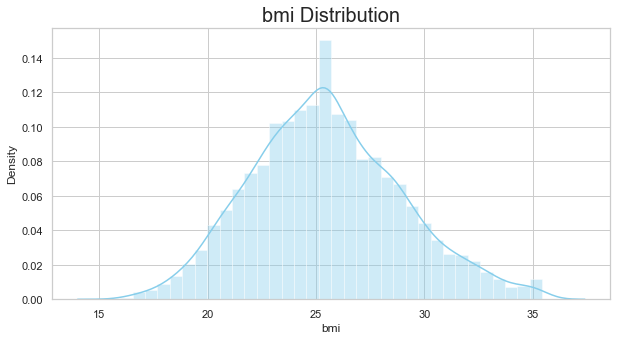

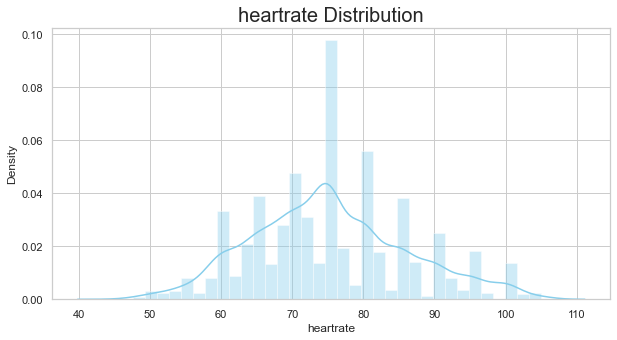

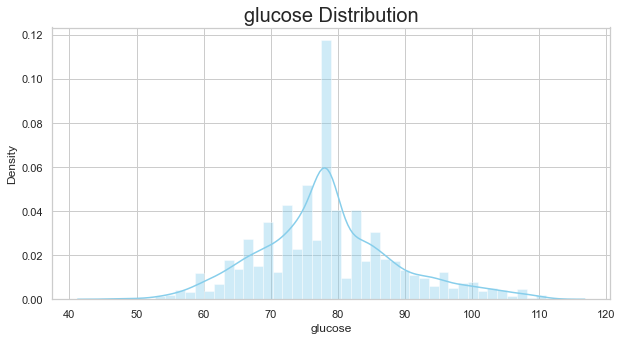

In [165]:
numerical_variables=['age','cigsperday','totchol','sysbp','diabp','bmi','heartrate','glucose']
for feature in numerical_variables:
    plt.figure(figsize=(10,5),facecolor='w')
    sns.distplot(df[feature],color='skyblue',bins='auto')
    plt.title(f'{feature} Distribution',fontsize=20)
    plt.show()
    

#### Conclusion:
- totchol,sysbp,bmi have uniform distribution while age,cigsperday,heartrate and glucose are unevenly distributed

### 5.3) Bivarite Analysis

- Countplot of people who is smoking or not according to the gender.

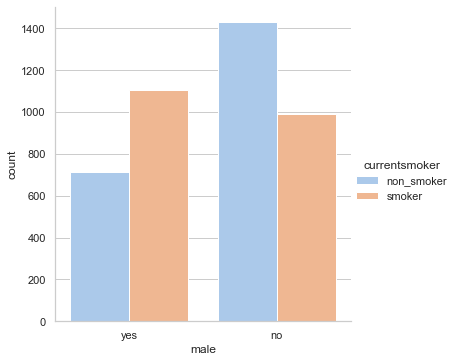

In [166]:
sns.catplot(data=df,kind='count',x='male',hue='currentsmoker',palette='pastel')
plt.show()

#### Conclusion: Male smoke more that female

- No of people affecting with CHD on the basis of their sex

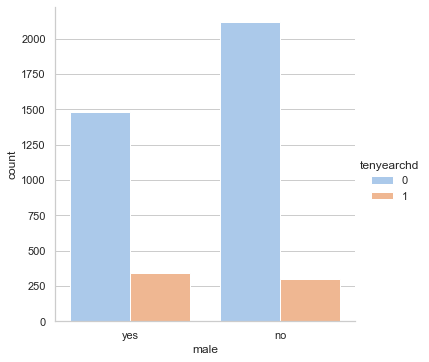

In [167]:
sns.catplot(data=df,x='male',kind='count',hue='tenyearchd',palette='pastel')
plt.show()

#### Conclusion: Both female and male have both chances of getting CHD

<Figure size 2160x1080 with 0 Axes>

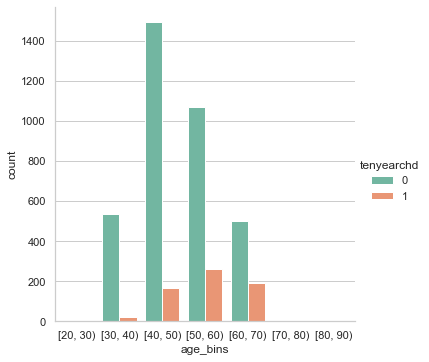

In [168]:
df['age_bins'] = pd.cut(df['age'], bins=range(20, 100, 10), right=False)
plt.figure(figsize=(30,15))
sns.catplot(data=df,x='age_bins',hue='tenyearchd',kind='count',palette='Set2')
plt.show()

#### Conclusion:
- Chances of getting CHD are mostly among the age group 50-60.
- While age group between 30 has the lowest chances of getting CHD

### Relationship between diabp and risk of TenyearCHD

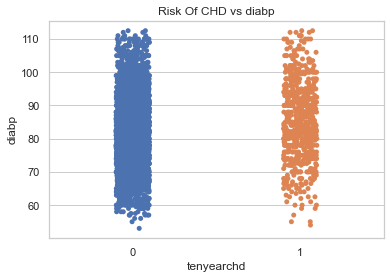

In [169]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='tenyearchd',y='diabp',data=df)
plt.title('Risk Of CHD vs diabp')
plt.show()

### 5.6) Multivarite Analysis
- Relationship between Age,cigsPerDay and TenYearCHD

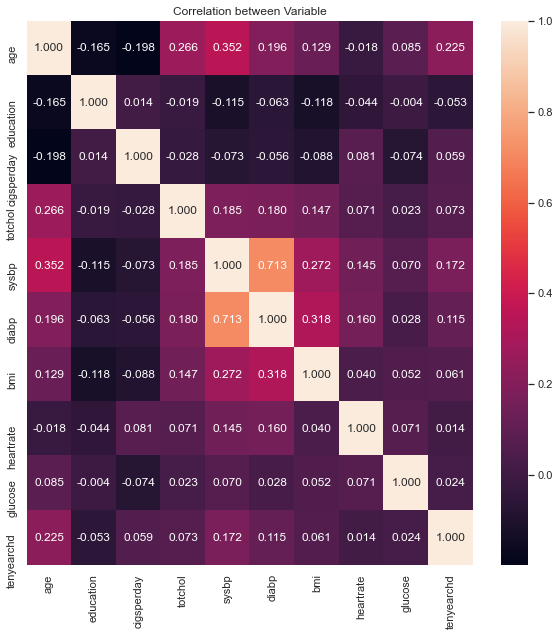

In [170]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt='.3f')
plt.title('Correlation between Variable')
plt.show()

## 6) Feature Selection

#### Feature selection
Feature selection is the process of choosing the most important features (variables) from your dataset that are relevant to your target variable. This step helps to improve the performance of machine learning models by reducing complexity, overfitting, and computation time.

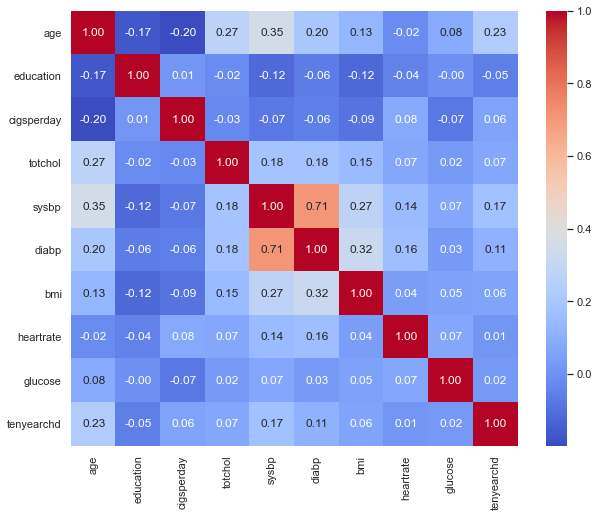

In [171]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [172]:
df.drop(['sysbp'],axis=1,inplace=True)
df.drop(['diabp'],axis=1,inplace=True)
df.drop(['age_bins'],axis=1,inplace=True)

## Converting back categorical variable into numerical variable for training purposes

In [173]:
male_values = {'no': 0, 'yes': 1}
df['male'] = df['male'].map(male_values)

currentsmoker_values = {'non_smoker':0,'smoker':1}
df['currentsmoker'] = df['currentsmoker'].map(currentsmoker_values)

stroke_values = {'no_stroke':0,'stroke':1}
df['prevalentstroke'] = df['prevalentstroke'].map(stroke_values)

hype_values = {'no_hypertension':0,'hypertension':1}
df['prevalenthyp'] = df['prevalenthyp'].map(hype_values)

diabetes_values = {'no_diabetes':0,'diabetes':1}
df['diabetes'] = df['diabetes'].map(diabetes_values)
bpmeds_values = {'no bp meds':0,'bp meds':1}
df['bpmeds']=df['bpmeds'].map(bpmeds_values)


In [174]:
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0,0,0,0,195.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,23.10,85.0,85.0,0


In [175]:
df.to_csv("preprocessing.csv",index=False)